# Estacionariedad de una Serie de Tiempo y la prueba de Dickey-Fuller

En esta lección vamos a entender qué es la estacionaridad de una Serie de Tiempo, porqué resulta importante determinar si una Serie es o no estacionaria y cómo verificar la estacionariedad de una serie con la prueba de Dickey-Fuller.

Así que comenzaremos viendo algunos sencillos ejemplos que nos permitirán tener una idea intuitiva de lo que es la estacionariedad. Con esto posteriormente veremos una definición formal del concepto de estacionariedad y luego veremos cómo determinar, de manera rigurosa a través de la prueba Dickey-Fuller, si una serie es o no estacionaria. Y finalizaremos con un ejemplo práctico de uso de esta prueba usando la librería "statsmodels".

## 1. Idea intuitiva de la estacionariedad

Veamos cuatro diferentes series de tiempo y para cada una analicemos el comportamiento de su media y su desviación estándar a lo largo del tiempo:

<b><p style="text-align: center;">Ejemplo 1: serie estacionaria</p>
<img src="01-estacionaria.png" style="width: 920px;"/>
    
<b><p style="text-align: center;">Ejemplo 2: serie con tendencia. NO estacionaria</p>
<img src="02-no-estacionaria-tendencia.png" style="width: 920px;"/>
    
<b><p style="text-align: center;">Ejemplo 3: serie estacional. NO estacionaria</p>
<img src="03-no-estacionaria-estacional.png" style="width: 920px;"/>

<b><p style="text-align: center;">Ejemplo 4: serie no estacionaria</p>
<img src="04-no-estacionaria-media-constante-std-variable.png" style="width: 920px;"/>

<b><p style="text-align: center;">Ejemplo 5: serie estacional y con tendencia. NO estacionaria</p>
<img src="05-no-estacionaria-tend-est.png" style="width: 920px;"/>


## 2. Definición e importancia de la estacionariedad

### 2.1. Definición

Con base en los ejemplos anteriores ya podemos dar una definición formal al concepto de estacionariedad:

<div class="alert alert-block alert-success"> Una Serie de Tiempo es estacionaria si su media y desviación estándar NO cambian a lo largo del tiempo </div>

### 2.2. Importancia

En esencia **¡porque es más fácil generar predicciones sobre series estacionarias que no estacionarias!**

En general estas predicciones se refieren a modelos clásicos (ARIMA, ARMA, etc.).

Si la Serie de Tiempo es NO estacionaria existen diferentes estrategias para hacerla estacionaria. De estas estrategias hablaremos en próximos cursos.

## 3. ¿Cómo determinar si una Serie de Tiempo es o no estacionaria?

El método gráfico que vimos al comienzo de la lección es muy subjetivo, así que lo más recomendable es aplicar una prueba estadística conocida como la **prueba de Dickey-Fuller**.

Para entender esta prueba debemos comprender inicialmente el concepto de raíz unitaria de una Serie.

### 3.1. La raíz unitaria de una serie

Supongamos que queremos crear un modelo predictivo super simple: el modelo debe predecir el siguiente valor de la Serie de Tiempo con base en el valor anterior.

Digamos que asumimos este sencillo modelo:

$$y_t = \phi y_{t-1} + \epsilon_t$$

donde:

- $y_t$ es el valor futuro de la Serie (el valor que queremos predecir)
- $y_{t-1}$ es el valor presente de la Serie (el que usaremos como referencia para generar la predicción)
- $\epsilon_t$ es un término aleatorio que representa el componente intrínseco de la Serie de Tiempo que no podemos representar con $y_{t-1}$
- $\phi$ es un coeficiente que debemos encontrar con el fin de generar las mejores predicciones

Con base en este sencillo modelo consideremos tres diferentes situaciones para el valor de $|\phi|$:

- $|\phi| > 1$
- $|\phi| = 1$
- $|\phi| < 1$

Para ver qué ocurre en cada situación, generemos una Serie de Tiempo en cada caso y suponiento que $y_0$ (el primer valor de la Serie) es igual a 0.1.

Simulemos el comportamiento de la Serie suponiendo $|\phi| > 1$:

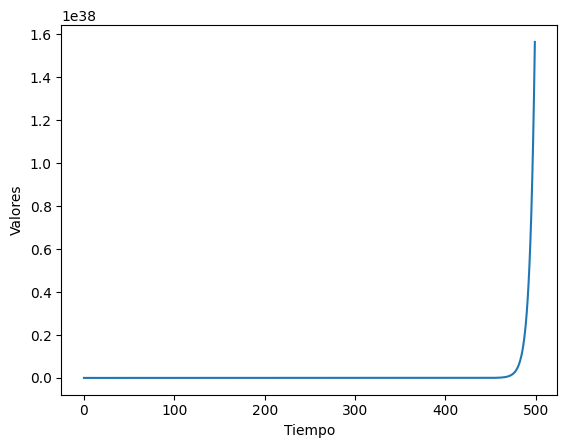

In [3]:
import numpy as np
import matplotlib.pyplot as plt

PHI = 1.2 # PHI > 1
y = [0.1] # y0 = 0.1, y1 = 1.2*y0 + e_t, y2 = 1.2*y1 + e_t...

# Generar 500 muestras de la serie
for i in range(1,500):
    pred = PHI*y[i-1] + 0.05*np.random.randn()
    y.append(pred)

# Graficar la serie resultante
plt.plot(y)
plt.xlabel('Tiempo')
plt.ylabel('Valores');

Vemos que con $|\phi| > 1$ la serie "explota": tiene a valores infinitos positivos o negativos. Es decir que su media y su desviación no se mantienen constantes y por tanto es NO estacionaria.

Veamos qué ocurre cuando $|\phi| = 1$:

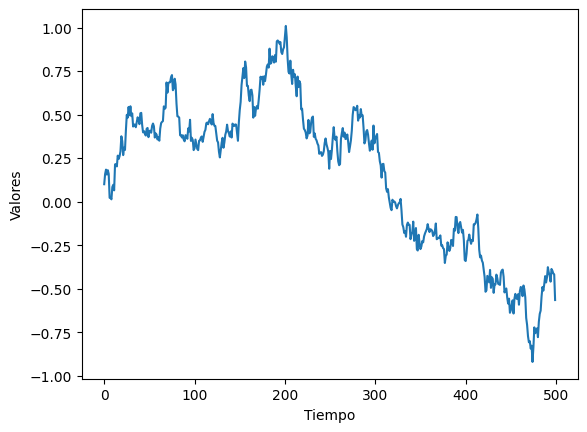

In [8]:
PHI = 1.0
y = [0.1] # y0 = 0.1

# Generar 500 muestras de la serie
for i in range(1,500):
    pred = PHI*y[i-1] + 0.05*np.random.randn()
    y.append(pred)

# Graficar
plt.plot(y)
plt.xlabel('Tiempo')
plt.ylabel('Valores');

En este caso la Serie no tiene tendencia creciente o decreciente sino que tiene ciclos. Pero en todo caso su media y su desviación estándar cambian con el tiempo y por tanto para $|\phi|=1$ la serie es NO estacionaria.

Veamos la última situación, cuando $|\phi|<1$:

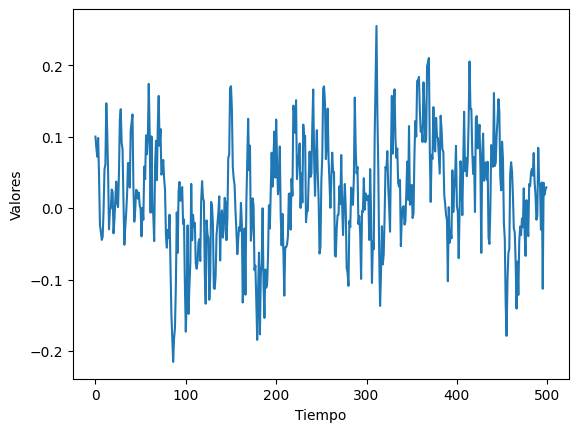

In [13]:
PHI = 0.8
y = [0.1] # y0 = 0.1

# Generar 500 muestras de la serie
for i in range(1,500):
    pred = PHI*y[i-1] + 0.05*np.random.randn()
    y.append(pred)

# Graficar
plt.plot(y)
plt.xlabel('Tiempo')
plt.ylabel('Valores');

Vemos que en este caso la Serie de Tiempo mantiene su media y desviación estándar relativamente constantes. Así que para $|\phi|<1$ la serie **es estacionaria**.

Resumamos entonces estas observaciones:

- $|\phi|>1$ $\rightarrow$ NO estacionaria
- $|\phi|=1$ $\rightarrow$ NO estacionaria. La serie tiene una **raíz unitaria**
- $|\phi|<1$ $\rightarrow$ **estacionaria**

### 3.2. Prueba de Dickey-Fuller

Teniendo claro el concepto de raíz unitaria de una Serie, ya resulta sencillo entender el principio de funcionamiento de la prueba de Dickey-Fuller.

En esencia:

<div class="alert alert-block alert-success"> La prueba de Dickey-Fuller es una prueba estadística que permite establecer si la Serie de Tiempo es estacionaria o no. Y en esencia lo que determina es si la Serie tiene o no una raíz unitaria ($|\phi|=1$). </div>

Las hipótesis de este test son:

- $H_0$ (hipótesis nula): $|\phi|=1$ (la serie tiene una raíz unitaria) $\rightarrow$ la serie es NO estacionaria
- $H_1$ (hipótesis alterna): $|\phi|<1$ (la serie NO tiene una raíz unitaria) $\rightarrow$ la serie es estacionaria

Y estos son los pasos para aplicar la prueba:

1. Se estima el valor de $\phi$ a partir de la Serie de Tiempo
2. Se calcula el valor p (Lección 9 curso "Estadística Inferencial: Fundamentos": significancia estadística y el valor p)
3. Y si:
    - $p < \alpha$ ($\alpha$: nivel de significancia) se rechaza la hipótesis nula $\rightarrow$ **la serie es estacionaria**
    - $p \geq \alpha$ es acepta la hipótesis nula $\rightarrow$ **la serie NO es estacionaria**

## 4. Ejemplos de aplicación de la prueba Dickey-Fuller

Teniendo claro el principio de funcionamiento de la prueba, veamos cómo aplicarlo a las Series de Tiempo generadas anteriormente.

Comencemos con la serie generada para un factor $|\phi| > 1$:

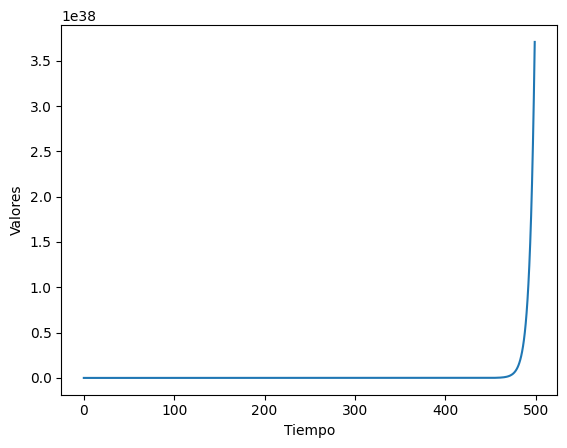

In [14]:
PHI = 1.2
y = [0.1] # y0 = 0.1

# Generar 500 muestras de la serie
for i in range(1,500):
    pred = PHI*y[i-1] + 0.05*np.random.randn()
    y.append(pred)

# Graficar
plt.plot(y)
plt.xlabel('Tiempo')
plt.ylabel('Valores');

Esta serie es NO estacionaria. Y esto lo podemos verificar usando la prueba de Dickey-Fuller de "statsmodels":

In [15]:
from statsmodels.tsa.stattools import adfuller

adfuller(y)

(6.2229067410205016e+16,
 1.0,
 14,
 485,
 {'1%': -3.443905150512834,
  '5%': -2.867517732199813,
  '10%': -2.569953900520778},
 48070.84378851912)

En este caso el valor de "p" es el primer término del arreglo resultante.

Así que para facilitar la aplicación de la prueba crearemos una sencilla función que toma este valor de p y lo compara con el nivel de significancia de 0.05 y con esto determina si la serie es o no estacionaria:

In [20]:
def verificar_estacionariedad(serie):
    # Realizar prueba
    adf = adfuller(serie)
    
    # Extraer el valor de p    
    p = adf[1]
    
    if p < 0.05:
        # Se rechaza la hipótesis nula: la serie es estacionaria
        print(f'La serie es estacionaria porque p = {p:.2f} < 0.05')
    else:
        # Se acepta la hipótesis nula: la serie es NO estacionaria
        print(f'La serie NO es estacionaria porque p = {p:.2f} >= 0.05')

Y ahora sí apliquemos esta función a la serie generada anteriormente:

In [21]:
verificar_estacionariedad(y)

La serie NO es estacionaria porque p = 1.00 >= 0.05


Ahora hagamos lo mismo para la serie con $\phi=1$:

La serie NO es estacionaria porque p = 0.14 >= 0.05


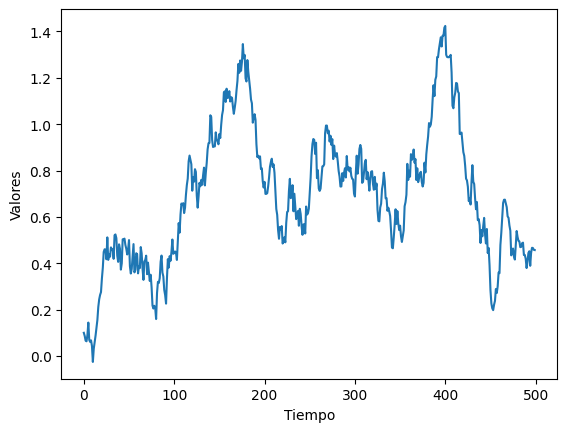

In [25]:
PHI = 1.0
y = [0.1] # y0 = 0.1

# Generar 500 muestras de la serie
for i in range(1,500):
    pred = PHI*y[i-1] + 0.05*np.random.randn()
    y.append(pred)

# Graficar
plt.plot(y)
plt.xlabel('Tiempo')
plt.ylabel('Valores');

# Y verificar estacionariedad
verificar_estacionariedad(y)

Y por último veamos la serie con $|\phi|<1$:

La serie es estacionaria porque p = 0.00 < 0.05


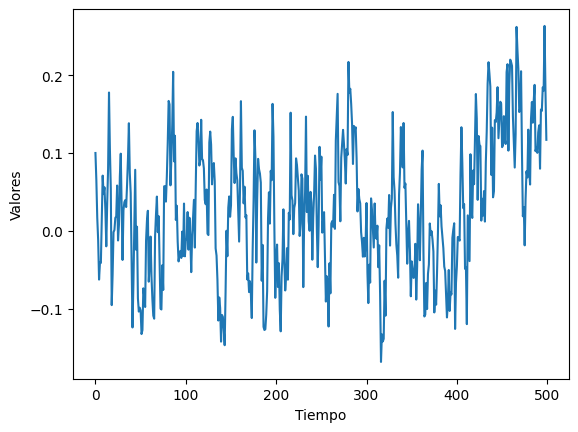

In [28]:
PHI = 0.8
y = [0.1] # y0 = 0.1

# Generar 500 muestras de la serie
for i in range(1,500):
    pred = PHI*y[i-1] + 0.05*np.random.randn()
    y.append(pred)

# Graficar
plt.plot(y)
plt.xlabel('Tiempo')
plt.ylabel('Valores');

# Y verificar estacionariedad
verificar_estacionariedad(y)

## 5. Aspectos a tener en cuenta

- Una serie es estacionaria si su media y desviación estándar no varían a lo largo del tiempo
- Muchos modelos predictivos clásicos han sido diseñados asumiendo que la Serie de Tiempo es estacionaria
- La forma recomendada de verificar si una serie es o no estacionaria es aplicando la prueba estadística de Dickey-Fuller